## Heart Attack Data Analysis and Prediction (Classification Project)

A heart attack, medically known as a myocardial infarction, is a serious and potentially life-threatening event that occurs when the blood flow to a part of the heart is blocked. This blockage is often the result of a clot obstructing the coronary arteries, which supply oxygen-rich blood to the heart muscle. When the heart muscle doesn't receive enough oxygen, it can become damaged or start to die, leading to a heart attack. 

If someone can identify heart attack early, there is a significant change him/her to get medical attention and survive from the danger.

<div class="alert alert-success">
    <h3>Table of content</h3>
    <ol>
        <li><a href="#Project-goal">Project goal</a></li>
        <li><a href="#Data-source-and-Data-description">Data source and Data description</a></li>
        <li><a href="#Load-dataset">Load dataset</a></li>
    </ol>
</div>

### Project goal
In this project I will develop a classification model for predicting the chance someone gets a hear attack based on the data provided in the dataset.

### Data source and Data description
I will be using [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv) from Kaggle.

Explanation about different features in the dataset.
- **Age** : Age of the patient
- **Sex** : Sex of the patient
- **cp** : Chest Pain type chest pain type
    - **Value 1** : Typical angina
    - **Value 2** : atypical angina
    - **Value 3** : Non-anginal pain
    - **Value 4** : Asymptomatic
- **trtbps** : Resting blood pressure (in mm Hg)
- **chol** : Cholestoral in mg/dl fetched via BMI sensor
- **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **rest_ecg** : Resting electrocardiographic results
    - **Value 0** : Normal
    - **Value 1** : Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - **Value 2** : Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach** : Maximum heart rate achieved
- **exang** : Exercise induced angina (1 = yes; 0 = no)
- **oldpeak** : Previous peak
- **slp** : Speech Language Pathology
- **caa** : Number of major vessels (0-3)
- **target** : 0= less chance of heart attack 1= more chance of heart attack

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

%matplotlib inline

### Load dataset

In [29]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [51]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
continueous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

### Check basic info about the dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<div class="alert alert-info">
    <h4>Observations:</h4>
    <ul>
        <li>The dataset consists of 303 rows and 14 columns.</li>
        <li>8 categorical features, and 5 continueous features.</li>
        <li>No missing values.</li>
        <li>Datatypes of all the features are valid and accurate.</li>
    </ul>
    This dataset is clean for further proceedings
</div>

### Exploratory Data Analysis (EDA)
#### Descriptive statistics

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


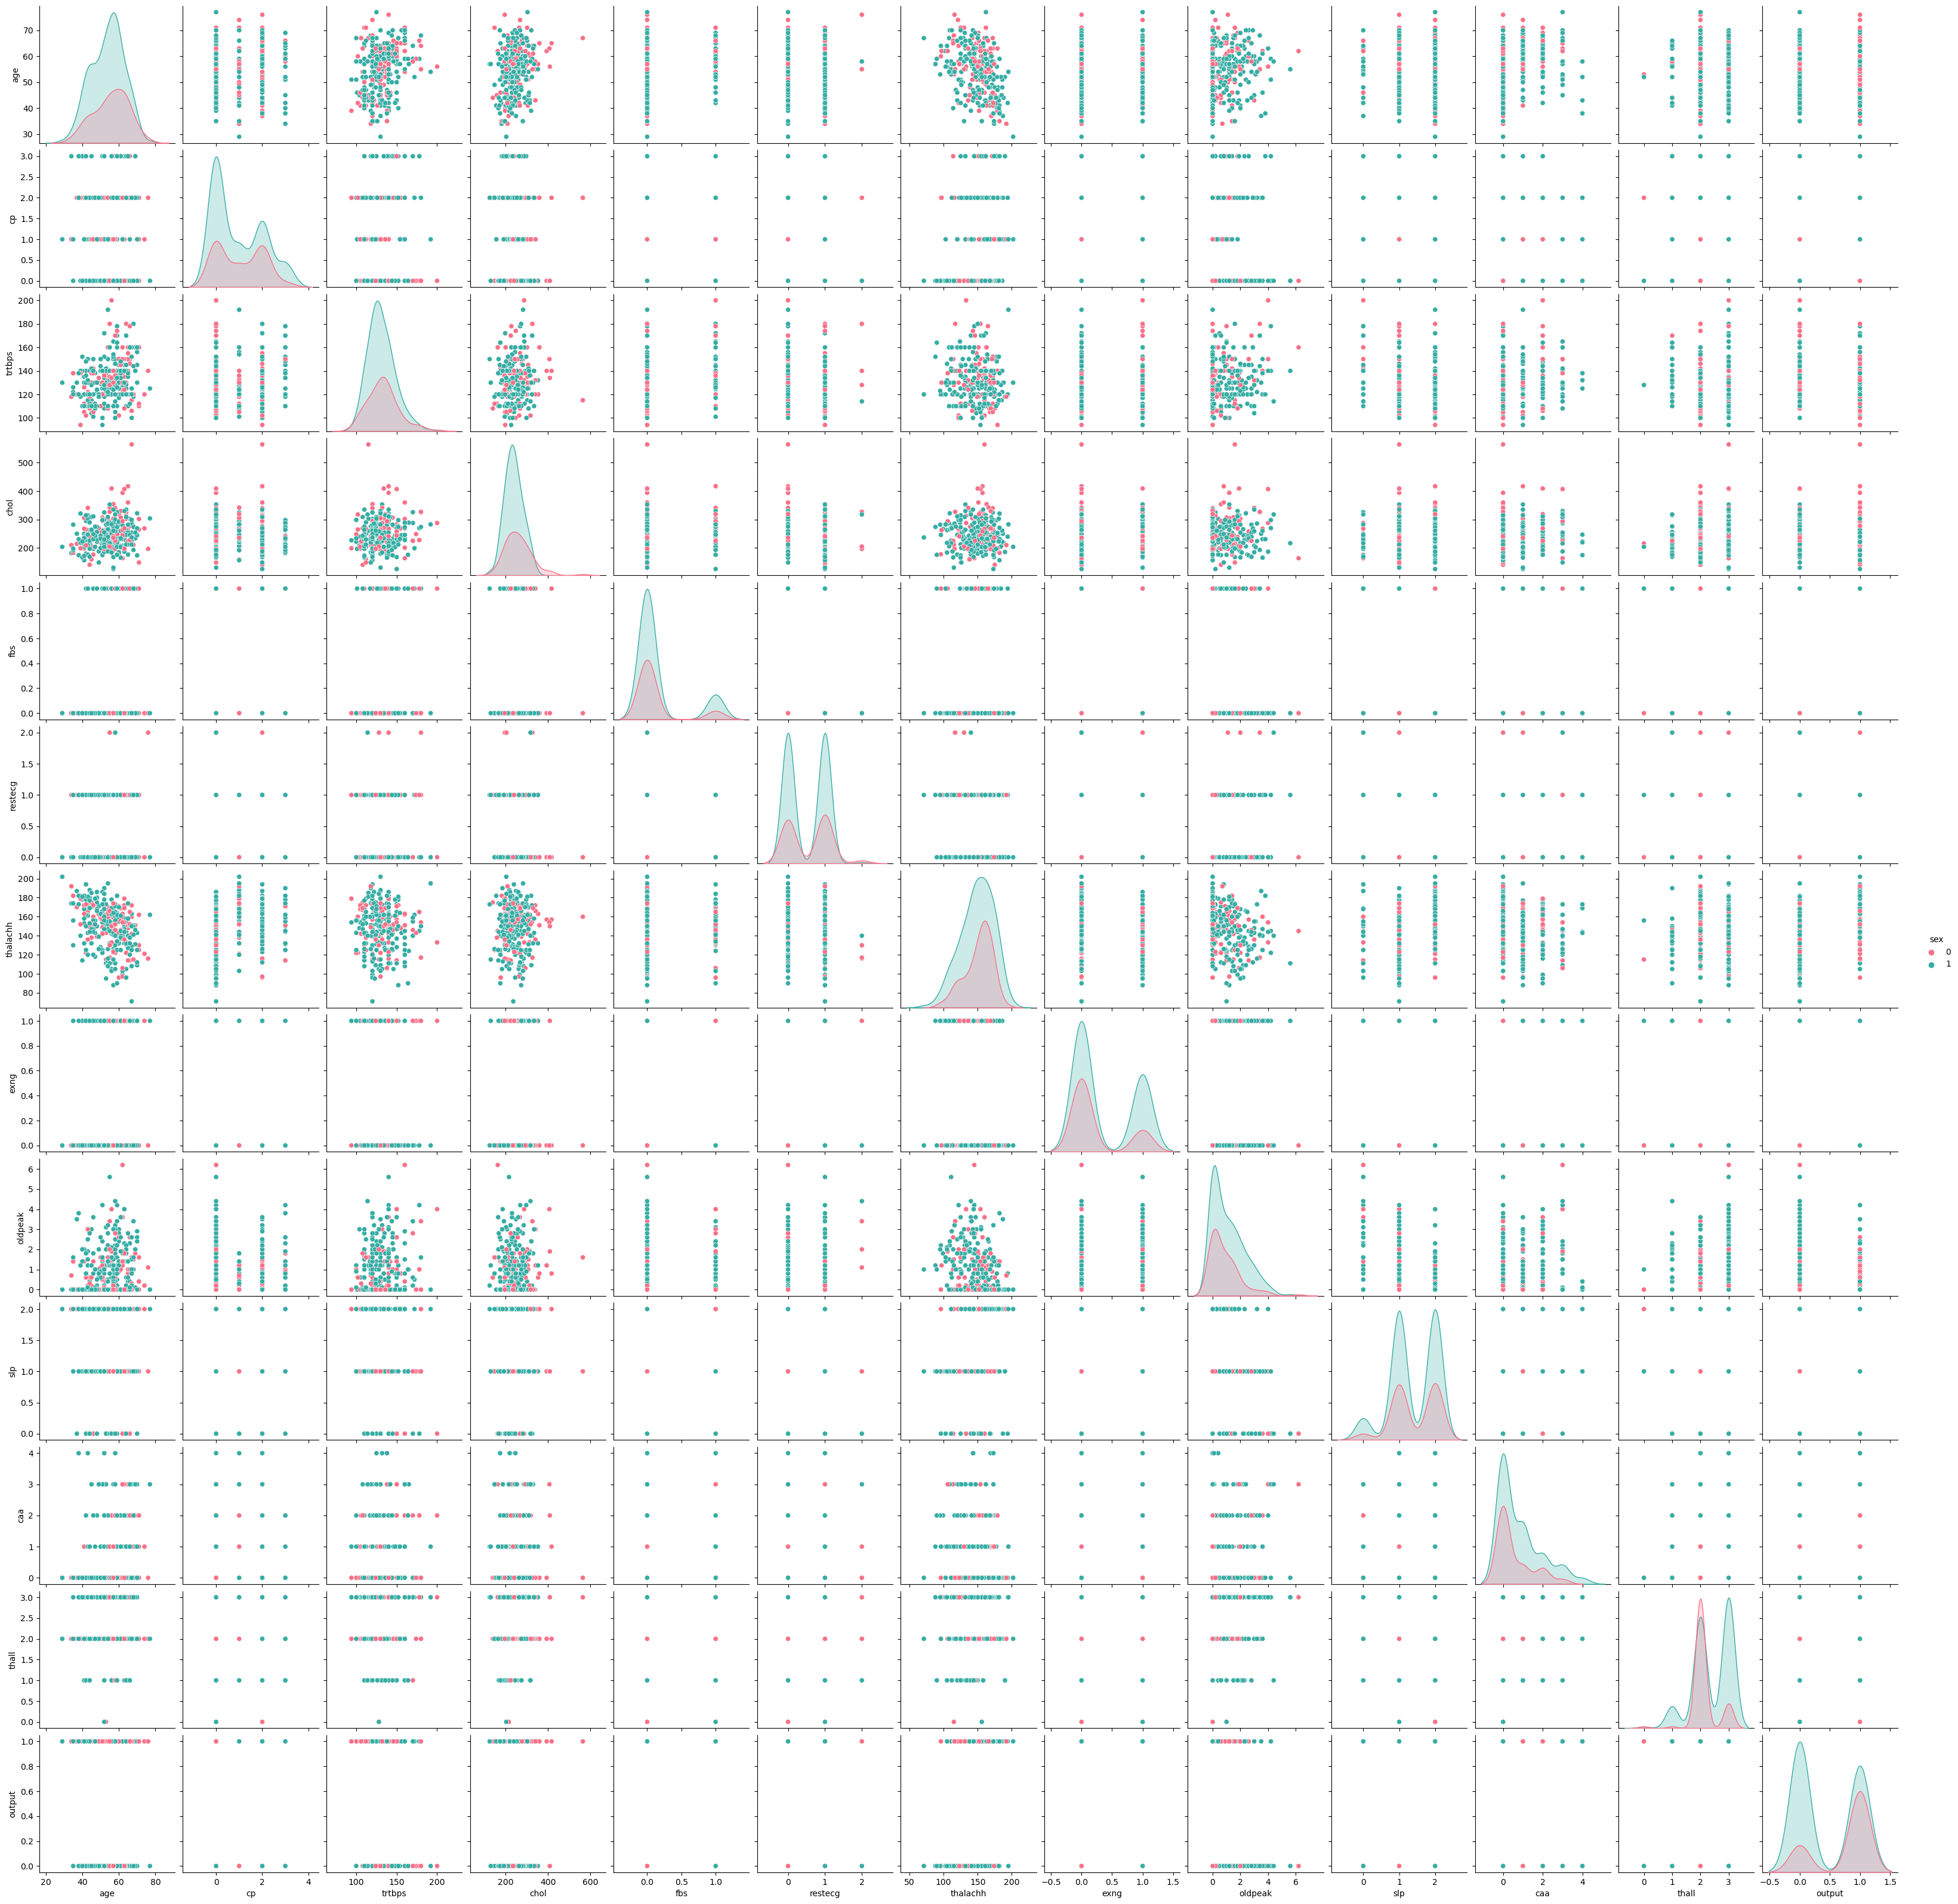

In [7]:
sns.pairplot(data=df, hue="sex", palette="husl")
plt.show()

## Data Preprocessing
There are categorical fields with multiple values in them. So, it is a good idea to separate them into dummy variables.

### Generate dummy variables

In [55]:
def generate_dummies(original_dataFrame, categorical_columns):
    """
    This method will generate dummy variables for provided categorical features in the dataset.

    Inputs:
    original_dataFrame: Original DataFrame of the dataset
    categorical_columns: List - List of categorical column names
    
    Output:
    Dataframe with dummy variables
    """

    to_final_dataframe = [original_dataFrame]

    for col in categorical_columns:
        dummy = pd.get_dummies(original_dataFrame[col], prefix=col)
        to_final_dataframe.append(dummy)

    output_data_frame = pd.concat(to_final_dataframe, axis=1).drop(categorical_columns, axis=1)

    return output_data_frame
        

In [61]:
df_ = generate_dummies(df, categorical_columns)
df_.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


#### Transforming Data

According to the *descriptive statistics* we saw above, the range of values in different features is high. Therefore, we should use a scalar function to bring the data into a similar scale. Further, I cannot see any negative values in the dataset as well. Therefore, here in this project I will be using *StandardScalar* which we can have a scalar between values 0 and 1.

### Build the Pipeline

#### Split data with *ShuffleSplit*
In this dataset, target variable is not shuffled. Therefore, when we split data into *train* and *validation* sets, we have to shuffle it. Kfold cross validation is a good technique to be used in this kind of scenario.

In [69]:
X = df_.loc[:, df_.columns != 'output']
y = df_['output']

print(X.shape, y.shape)

(303, 30) (303,)


In [154]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

#### Logistic Regression

In [155]:
scalar = StandardScaler()
lr = LogisticRegression()

pipe = Pipeline([('scalar', scalar), ('lr', lr)])

pipe.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()), ('lr', LogisticRegression())],
 'verbose': False,
 'scalar': StandardScaler(),
 'lr': LogisticRegression(),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False}

In [156]:
lr_gcv_params = {
    'lr__C': [0.5, 1, 2]
}

In [157]:
lr_gcv = GridSearchCV(estimator=pipe, param_grid=lr_gcv_params, cv=cv)

In [158]:
lr_gcv.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.5, 1, 2]})

In [159]:
lr_gcv.best_score_

0.8578947368421052

In [160]:
cross_val_score(lr_gcv, X, y, cv=cv)

array([0.86842105, 0.85526316, 0.80263158, 0.80263158, 0.88157895,
       0.84210526, 0.90789474, 0.86842105, 0.89473684, 0.84210526])

#### Decision Tree Classifier

In [161]:
pipe_dt_clf = Pipeline(steps=[('scalar', scalar), ('dt', DecisionTreeClassifier())])

In [162]:
pipe_dt_clf.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()), ('dt', DecisionTreeClassifier())],
 'verbose': False,
 'scalar': StandardScaler(),
 'dt': DecisionTreeClassifier(),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': None,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__random_state': None,
 'dt__splitter': 'best'}

In [163]:
dt_param_grid = {
    'dt__criterion': ["gini", "entropy", "log_loss"],
    'dt__splitter': ["best", "random"]
}

In [164]:
dt_gcv = GridSearchCV(estimator=pipe_dt_clf, param_grid=dt_param_grid, cv=cv, verbose=3)

In [165]:
dt_gcv.fit(X, y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END dt__criterion=gini, dt__splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END dt__criterion=gini, dt__splitter=best;, score=0.829 total time=   0.0s
[CV 3/10] END dt__criterion=gini, dt__splitter=best;, score=0.724 total time=   0.0s
[CV 4/10] END dt__criterion=gini, dt__splitter=best;, score=0.789 total time=   0.0s
[CV 5/10] END dt__criterion=gini, dt__splitter=best;, score=0.803 total time=   0.0s
[CV 6/10] END dt__criterion=gini, dt__splitter=best;, score=0.697 total time=   0.0s
[CV 7/10] END dt__criterion=gini, dt__splitter=best;, score=0.763 total time=   0.0s
[CV 8/10] END dt__criterion=gini, dt__splitter=best;, score=0.711 total time=   0.0s
[CV 9/10] END dt__criterion=gini, dt__splitter=best;, score=0.789 total time=   0.0s
[CV 10/10] END dt__criterion=gini, dt__splitter=best;, score=0.803 total time=   0.0s
[CV 1/10] END dt__criterion=gini, dt__splitter=random;, score=0.737 total time=   0.0s
[

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__splitter': ['best', 'random']},
             verbose=3)

In [166]:
dt_gcv.best_score_

0.7802631578947368

In [167]:
cross_val_score(pipe_dt_clf, X, y, cv=cv)

array([0.77631579, 0.77631579, 0.77631579, 0.72368421, 0.86842105,
       0.67105263, 0.78947368, 0.69736842, 0.81578947, 0.78947368])

#### Support Vector Classifier

In [168]:
pipe_svc = Pipeline([('scalar', scalar), ('svc', SVC())])

pipe_svc.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'scalar': StandardScaler(),
 'svc': SVC(),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [169]:
svc_params = {
    'svc__C': [0.5, 1.0, 2.0],
    'svc__kernel': ['linear', 'rbf', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}

In [170]:
gcv_svc = GridSearchCV(estimator=pipe_svc, param_grid=svc_params, cv=cv, verbose=3)

In [171]:
gcv_svc.fit(X, y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0.816 total time=   0.0s
[CV 2/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0.868 total time=   0.0s
[CV 3/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0.816 total time=   0.0s
[CV 4/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0.816 total time=   0.0s
[CV 5/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0.908 total time=   0.0s
[CV 6/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0.816 total time=   0.0s
[CV 7/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0.908 total time=   0.0s
[CV 8/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0.882 total time=   0.0s
[CV 9/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0.895 total time=   0.0s
[CV 10/10] END svc__C=0.5, svc__gamma=scale, svc__kernel=linear;, score=0

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.5, 1.0, 2.0],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [172]:
gcv_svc.best_score_

0.8618421052631579

In [173]:
gcv_svc.best_params_

{'svc__C': 0.5, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid'}

In [175]:
model_scores = pd.DataFrame({
    'LR': [0.8578947368421052],
    'DTC': [0.7802631578947368],
    'SVC': [0.8618421052631579]
})

model_scores

,LR,DTC,SVC
0,0.857895,0.780263,0.861842


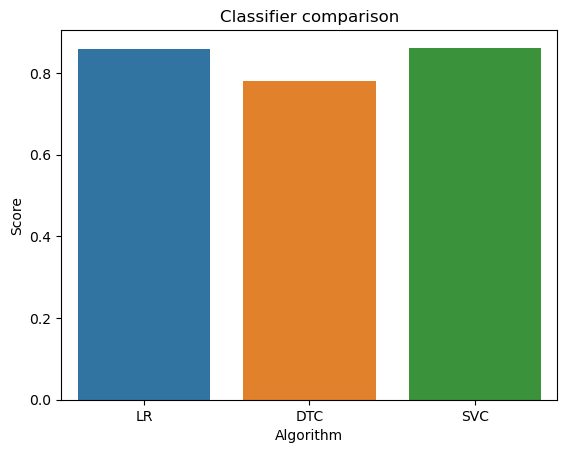

In [177]:
sns.barplot(data=model_scores)
plt.title('Classifier comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.show()

Support Vector Classifier performs well from above three algorithms.

## Save the model

In [181]:
picke_file_name = "models/heart_SVC_model.pkl"
with open(picke_file_name, 'wb') as file:
    pickle.dump(gcv_svc, file)